In [41]:
import tensorflow as tf

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import collections
import random
import re
import numpy as np
import os
import time
import json
from glob import glob
from PIL import Image
from tqdm import tqdm
from collections import defaultdict
from pathlib import Path, PurePath
import pickle

In [ ]:
# Download the caption annotation files

path = Path.cwd()
a = PurePath(path)
annotation_folder = PurePath('annotations')
if(not path.resolve()):
  annotation_zip = tf.keras.utils.get_file('captions.zip', cache_subdir=(path), origin = 'http://images.cocodataset.org/annotations/annotations_trainval2014.zip', extract=True)
  
  annotation_file = PurePath(annotation_folder)
  annotation_file = annotation_folder / 'captions_train2014.json'
  os.remove(annotation_zip)
  print(annotation_file)
  print(annotation_folder)
#Download the image files

image_folder = 'train2014'
if not os.path.exists(os.path.abspath('.')+image_folder):
  image_zip = tf.keras.utils.get_file('train2014.zip', cache_subdir = os.path.abspath('.'), origin = 'http://images.cocodataset.org/zips/train2014.zip', extract=True)
  
  PATH = os.path.dirname(image_zip)+image_folder
  os.remove(image_zip)

else:
  PATH = os.path.abspath('.')+image_folder
print(os.path.dirname(PATH))
print(annotation_file)

10457874432/13510573713 [======================>.......] - ETA: 11:29

In [ ]:
a = Path(PATH)
annotation_file = 

with open(annotation_file.open(), 'r') as f:
  annotations = json.load(f)
print(type(annotations), len(annotations), np.ndim(annotations), np.shape(annotations))

In [33]:
# Group all the captions together that have the same image ID

image_path_to_caption = collections.defaultdict(list)
for val in annotations['annotations']:
  caption = f"<start> {val['caption']} <end>"
  image_path = PATH + 'COCO_train2014_' + '%012d.jpg' % (val['image_id'])
  image_path_to_caption[image_path].append(caption)

In [38]:
print(type(caption), len(caption), np.size(caption),np.shape(caption), np.ndim(caption))
print(type(image_path), len(image_path), np.size(image_path), np.shape(image_path), np.ndim(image_path))

<class 'str'> 59 1 () 0
<class 'str'> 100 1 () 0


In [34]:
print(type(image_path_to_caption))
print(cap_vector.dtype)
print(np.size(image_path_to_caption))
print(np.shape(image_path_to_caption))
print(np.ndim(image_path_to_caption))
for keys,values in image_path_to_caption:
  for i in range(0, 10, 1):
    print(image_path_to_caption.keys(keys), image_path_to_caption.values(values))
    

<class 'collections.defaultdict'>
int32
1
()
0


ValueError: too many values to unpack (expected 2)

In [30]:
image_paths = list(image_path_to_caption.keys())
random.shuffle(image_paths)

for i in range(0, 10, 1):
  print(image_paths[i])

# I'm supposed to select the first 6000 image_paths from the shuffled set.
# Each would have approx 5 captions associate with it, leading to 30k examples.
# Fuck that, we're doing the entire 82783
train_image_paths = image_paths
for i in range(0, 10, 1):
  print(train_image_paths[i])

C:\Users\jedgo\TensorFlow\TF Tutorials\TFHub\Customization/train2014/COCO_train2014_000000253883.jpg
C:\Users\jedgo\TensorFlow\TF Tutorials\TFHub\Customization/train2014/COCO_train2014_000000545953.jpg
C:\Users\jedgo\TensorFlow\TF Tutorials\TFHub\Customization/train2014/COCO_train2014_000000494794.jpg
C:\Users\jedgo\TensorFlow\TF Tutorials\TFHub\Customization/train2014/COCO_train2014_000000080234.jpg
C:\Users\jedgo\TensorFlow\TF Tutorials\TFHub\Customization/train2014/COCO_train2014_000000387512.jpg
C:\Users\jedgo\TensorFlow\TF Tutorials\TFHub\Customization/train2014/COCO_train2014_000000472659.jpg
C:\Users\jedgo\TensorFlow\TF Tutorials\TFHub\Customization/train2014/COCO_train2014_000000217856.jpg
C:\Users\jedgo\TensorFlow\TF Tutorials\TFHub\Customization/train2014/COCO_train2014_000000272081.jpg
C:\Users\jedgo\TensorFlow\TF Tutorials\TFHub\Customization/train2014/COCO_train2014_000000224733.jpg
C:\Users\jedgo\TensorFlow\TF Tutorials\TFHub\Customization/train2014/COCO_train2014_0000004

In [29]:
train_captions = []
img_name_vector = []
for image_paths in train_image_paths:
  caption_list = image_path_to_caption[image_path]
  train_captions.extend(caption_list)
  img_name_vector.extend([image_path] * len(caption_list))

In [29]:
print(type(train_image_paths), len(train_image_paths))  
print(len(image_path_to_caption), type(image_path_to_caption))  
print(len(caption_list), type(caption_list))
print(len(train_captions), type(train_captions))
print(len(img_name_vector), type(img_name_vector))
print(len(image_path), type(image_path))
for i in range(0,10,1):
  print(image_path)
img_to_cap_vector = collections.defaultdict(list)
# img_to_cap_vector = {img:cap for (img,cap)}

<class 'list'> 82783
82783 <class 'collections.defaultdict'>
5 <class 'list'>
413915 <class 'list'>
413915 <class 'list'>
100 <class 'str'>
C:\Users\jedgo\TensorFlow\TF Tutorials\TFHub\Customization/train2014/COCO_train2014_000000133071.jpg
C:\Users\jedgo\TensorFlow\TF Tutorials\TFHub\Customization/train2014/COCO_train2014_000000133071.jpg
C:\Users\jedgo\TensorFlow\TF Tutorials\TFHub\Customization/train2014/COCO_train2014_000000133071.jpg
C:\Users\jedgo\TensorFlow\TF Tutorials\TFHub\Customization/train2014/COCO_train2014_000000133071.jpg
C:\Users\jedgo\TensorFlow\TF Tutorials\TFHub\Customization/train2014/COCO_train2014_000000133071.jpg
C:\Users\jedgo\TensorFlow\TF Tutorials\TFHub\Customization/train2014/COCO_train2014_000000133071.jpg
C:\Users\jedgo\TensorFlow\TF Tutorials\TFHub\Customization/train2014/COCO_train2014_000000133071.jpg
C:\Users\jedgo\TensorFlow\TF Tutorials\TFHub\Customization/train2014/COCO_train2014_000000133071.jpg
C:\Users\jedgo\TensorFlow\TF Tutorials\TFHub\Customi

<start> Bread, sour cream, and guacamole are arrayed on a plate with a lemon slice. <end>


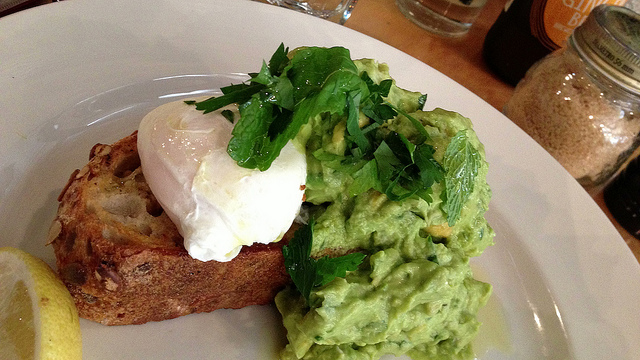

In [8]:
print(train_captions[0])
Image.open(img_name_vector[0])

In [9]:
def load_image(image_path):
  img = tf.io.read_file(image_path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, (299,299))
  img = tf.keras.applications.inception_v3.preprocess_input(img)
  return img, image_path

In [10]:
image_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

In [11]:
# Get the unique images

encode_train = sorted(set(img_name_vector))

# Feel free to change the batch_size according to our system config (hehehe)

image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(1024)

for img, path in tqdm(image_dataset):
  batch_features = image_features_extract_model(img, path)
  batch_features = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))
  
  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.56s/it]


In [12]:
# Find the maximum length of any caption in our dataset

def calc_max_length(tensor):
  return max(len(t) for t in tensor)

In [13]:
# I'm supposed to choose the top 5000 words, but fuck that

top_k = 30000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k, oov_token="<unk>", filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')

tokenizer.fit_on_texts(train_captions)
train_seqs = tokenizer.texts_to_sequences(train_captions)
print(type(train_seqs), len(train_seqs))

<class 'list'> 413915


In [14]:
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

In [15]:
# Create the tokenized vectors

train_seqs = tokenizer.texts_to_sequences(train_captions)
print(type(train_seqs), len(train_seqs))
# note = 0
# for i in range(len(train_captions)):
#   note += 1
# print(note)

<class 'list'> 413915


In [18]:
# Pad each vector to the maximum length (max_length) of the captions
# If you do not provide a max_length value, pad_sequences calculates it automatically
# Note, the vector is 2 dimensional.  The first dimension holds the images, the second holds the length of sequences

cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')
# note = 0
# for i in range(len(cap_vector)):
#   note += 1
# print(note)
print(type(cap_vector))
print(cap_vector.dtype)
print(np.size(cap_vector))
print(np.shape(cap_vector))
print(np.ndim(cap_vector))
# print(np.len(cap_vector))
print(len(img_name_vector))
print(cap_vector[0][:])
print(type(img_name_vector))
print(len(cap_vector[:][1]))
print(img_name_vector[0])

<class 'numpy.ndarray'>
int32
7864385
(413915, 19)
2
413915
[ 3 11  7  8  9 12 17 18 13  2  5 10  2 14 15  4  0  0  0]
<class 'list'>
19
C:\Users\jedgo\TensorFlow\TF Tutorials\TFHub\Customization/train2014/COCO_train2014_000000133071.jpg


In [16]:
# Calculates max_lengths, which is used to store the attention weights

max_length = calc_max_length(train_seqs)

# Compared to the previous values, this is small, but this isn't the size of the dataset.  Its the size of the caption vectors
# print(max_length)

In [50]:
# img_to_cap_vector = collections.defaultdict(list)
#for img, cap in zip(img_name_vector, cap_vector):
# img_to_cap_vector = {cap:img for (cap,img) in zip(cap_vector,img_name_vector)}
# print(type(cap))
# print(type(img_to_cap_vector))
# img_to_cap_vector = img_name_vector[img].append(cap_vector[img][:])
i, j = 0, 0
for i in cap_vector:
  for j in cap_vector:
    print(cap_vector[i][j])
total = {cap:img for (cap,img) for zip(cap_vector, img_name_vector) while }

SyntaxError: invalid syntax (<ipython-input-50-c2113e097021>, line 11)

In [51]:
# Due to the annoying amounts of problems we've been having with the caption vector being two dimensional, we're going to split it into a values list and a key list, and see if we can't solve this problem that way.
# We shall recombine them afterwards.
# cap_vector_image, cap_vector_caption = np.hsplit(2, cap_vector)
# cap_vector_values = [cap_vector[1] for i in x]
print(len(img_name_vector[:]), len(cap_vector[:][:]))

413917 413915


In [49]:
img_to_cap_vector = collections.defaultdict(list)
for img,cap,code in zip(img_name_vector, cap_vector):
  img_to_cap_vector[img].append(cap)
len(img)
print(np.ndim(img_to_cap_vector))
# Create training and validation sets using an 80-20 split randomly.
img_keys = list(img_to_cap_vector.keys())
random.shuffle(img_keys)

slice_index = int(len(img_keys)*0.8)
print(slice_index)
img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]

img_name_train = []
cap_train = []
for imgt in img_name_train_keys:
  capt_len = len(img_to_cap_vector[imgt])
  img_name_train.extend([imgt] * capt_len)
  cap_train.extend(img_to_cap_vector[imgt])

img_name_val = []
cap_val = []
for imgv in img_name_val_keys:
  capv_len = len(img_to_cap_vector[imgv])
  img_name_val.extend([imgv] * capv_len)
  cap_val.extend(img_to_cap_vector[imgv])

ValueError: not enough values to unpack (expected 3, got 2)

img_to_cap_vector = collections.defaultdict(list)
for img in img_name_vector:
  for cap in cap_vector:
    img_to_cap_vector[img].append(cap)
# img_to_cap_vector = { img:cap for (img,cap) in zip(img_name_vector,cap_vector)}
# Create the training and validation sets w/a random 80/20 split.
img_keys = list(img_to_cap_vector.keys())
random.shuffle(img_keys)

slice_index = int(len(img_keys)*0.8)
print(slice_index)
img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]
#img_keys[:int(val_dist):1], img_keys[int(val_dist)::1]

img_name_train = []
cap_train = []

for imgt in img_name_train_keys:
  capt_len = len(img_to_cap_vector[imgt])
  img_name_train.extend([imgt] * capt_len)
  cap_train.extend(img_to_cap_vector[imgt])

img_name_val = []
cap_val = []
for imgv in img_name_val_keys:
  capv_len = len(img_to_cap_vector[imgv])
  img_name_val.extend([imgv] * capv_len)
  cap_val.extend(img_to_cap_vector[imgv])

In [20]:
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)

(0, 0, 413915, 413915)

In [21]:
# Original values, BATCH_SIZE = 64, BUFFER_SIZE = 1000, emb_dim = 256, units = 512

BATCH_SIZE = 128
BUFFER_SIZE = 3000
embedding_dim=256
units=512
vocab_size = top_k + 1
num_steps = len(img_name_train) // BATCH_SIZE
features_shape = 2-48
attention_features_shape = 64

In [22]:
def map_func(img_name, cap):
  img_tensor = np.load(img_name.decode('utf-8')+'.npy')
  return img_tensor, cap

In [23]:
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# Use the map function to load the numpy files in parallel

dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Shuffle and batch

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size = tf.data.experimental.AUTOTUNE)

In [24]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)
    
  def call(self, features, hidden):
    # features(CNN_encoder output) shape == (batch size, 64, embedding dim)
    
    # hidden shappe == (batch_size, hidden_size)
    # hidden with time axis shape == (batch_size, 1, hidden size)
    hidden_with_time_axis = tf.expand_dims(hidden, 1)
    
    # Attention hidden layer shape == (batch size, 64, units)
    attention_hidden_layer = (tf.nn.tanh(self.W1(features) +
                                         self.W2(hidden_with_time_axis)))
    
    # Score shape == (batch size, 64, 1)
    # This gives you an unnormalized score for each image feature
    score = self.V(attention_hidden_layer)
    
    # Attention weights shape == (batch size, 64, 1)
    attention_weights = tf.nn.softmax(score, axis=1)
    
    # Context Vector shape after sum == (batch size, hidden size)
    context_vector = attention_weights * features
    context_vector = tf.reduce_sum(context_vector, axis=1)
    
    return context_vector, attention_weights

In [25]:
class CNN_Encoder(tf.keras.Model):
  # Sincve we've already extracted the features and dumped them using pickle, we just pass this through a fully connected layer
  def __init__(self, embedding_dim):
    super(CNN_Encoder, self).__init__()
    #The shape after fc is (batch size, 64, embedding dim)
    self.fc = tf.keras.layers.Dense(embedding_dim)
    
  def call(self, x):
    x = self.fc(x)
    x = tf.nn.relu(x)
    return x

In [26]:
class RNN_Decoder(tf.keras.Model):
  def __init__(self, embedding_dim, units, vocab_size):
    super(RNN_Decoder, self).__init__()
    self.units = units
    
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    
    self.fc1 = tf.keras.layers.Dense(self.units)
    self.fc2 = tf.keras.layers.Dense(vocab_size)
    
    self.attention = BahdanauAttention(self.units)
    
  def call(self, x, features, hidden):
    # Defining attention as a separate model
    context_vector, attention_weights = self.attention(features, hidden)
    
    x = self.emmbedding(x)
    
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
    
    output, state = self.gru(x)
    x = self.fc1(output)
    x = tf.reshape(x, (-1, x.shape[2]))
    x = self.fc2(x)
    
    return x, state, attention_weights
  
  def reset_state(self, batch_size):
    return tf.zeros((batch_size, self.units))

In [27]:
encoder = CNN_Encoder(embedding_dim)
decoder = RNN_Decoder(embedding_dim, units, vocab_size)
optimizer = tf.keras.optimizers.Adam()
loss_obect = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equat(real, 0))
  loss_ = loss_object(real, pred)
  
  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask
  
  return tf.reduce_mean(loss_)

In [28]:
encoder = CNN_Encoder(embedding_dim)
checkpoint_path = "./checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder, decoder=decoder, optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [29]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
  start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
  # Restoring the latest checkpoint in checkpoint_path
  ckpt.restore(ckpt_manager.latest_checkpoint)

In [30]:
# Add this in a separate cell, otherwise the loss array will be lost every time the training cell is reset

loss_plot=[]

In [31]:
@tf.function
def train_step(img_tensor, target):
  loss = 0
  
  # Initializing the hidden state for each batch since the captions are independent of one another
  hidden = decoder.reset_state(batch_size=target.shape[0])
  
  dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
  
  with tf.GradientTape as tape:
    features = encoder(img_tensor)
    
    for i in range(1, target.shape[1]):
      
      predictions, hidden, _ = decoder(dec_input, features, hidden)
      
      loss += loss_function(target[: i], predictions)
      
      # Using Teacher Forcing
      dec_input = tf.expand_dims(target[:, i], 1)
      
  total_loss = ( loss / (target.shape[1]))

  trainable_variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, trainable_variables)

  optimizer.apply_gradients(zip(gradients, trainable_variables))

  return loss, total_loss

In [32]:
EPOCHS = 100

for epoch in range(start_epoch, EPOCHS):
  start = time.time()
  total_loss = 0
  
  for (batch_loss, (img_tensor, target)) in enumerate(dataset):
    batch_loss, t_loss = train_step(img_tensor, target)
    total_loss += t_loss
    
    if(batch % 100 == 0):
      print('Epoch {} Batch{} Loss{:.4f}'.format(epoch+1, batch, batch_loss.numpy() / int(target.shatpe[1])))
      
  #Storing the eppoch end  and losses for later
  loss_plot.append(total_loss/ num_steps)
  
  
  if (epoch % 5 == 0):
    ckpt_manager.save()
  
  print('Epoch {} Loss {:.6f}'.format(epoch+1, total_loss/num_steps))
  
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
     
     
     

ZeroDivisionError: division by zero